In [28]:
import numpy as np
import copy

In [2]:
# Метод простых итераций (МПИ)
def mpi(func, x0, eps, max_iter):
    x = x0
    for i in range(max_iter):
        x_new = func(x)
        if abs(x_new - x) < eps:
            return x_new, i + 1
        x = x_new
    return None, max_iter

In [3]:

def func1(x):
    return 1/ 2**x

def func2(x):
    return np.log2(1/x)

In [4]:
x_01 = 1
x_02 = 10
x_03 = 100
x_04 = 1000

eps = 1e-8
max_iter = 1000

In [5]:
print("Первая функция")

root1, iters1 = mpi(func1, x_01, eps, max_iter)
root2, iters2 = mpi(func1, x_02, eps, max_iter)
root3, iters3 = mpi(func1, x_03, eps, max_iter)
root4, iters4 = mpi(func1, x_04, eps, max_iter)

print("Начальное приближение = ", x_01)
print("Корень = ", root1)
print("Количество иттераций ", iters1)
print("----------------------------")

print("Начальное приближение = ", x_02)
print("Корень = ", root2)
print("Количество иттераций ", iters2)
print("----------------------------")

print("Начальное приближение = ", x_03)
print("Корень = ", root3)
print("Количество иттераций ", iters3)
print("----------------------------")

print("Начальное приближение = ", x_04)
print("Корень = ", root4)
print("Количество иттераций ", iters4)

Первая функция
Начальное приближение =  1
Корень =  0.6411857418981604
Количество иттераций  23
----------------------------
Начальное приближение =  10
Корень =  0.6411857419026338
Количество иттераций  25
----------------------------
Начальное приближение =  100
Корень =  0.6411857418981604
Количество иттераций  25
----------------------------
Начальное приближение =  1000
Корень =  0.6411857418981604
Количество иттераций  25


In [8]:
def newton_func(x):
    return x * 2**x - 1

In [9]:
def der(f, x0, h = 0.01):
    return 4/3 * (f(x0 + h) - f(x0 - h))/(2*h) - 1/3 * (f(x0 + 2*h) - f(x0 - 2*h))/(4*h)

In [10]:
# Метод Ньютона
def newton(f, x0, eps, max_iter):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = der(f, x)
        if abs(fx) < eps:
            return x, i + 1 
        if dfx == 0:
            return None, i
        x = x - fx / dfx
    return None, max_iter 

In [11]:
x_01 = 1
x_02 = 10
x_03 = 100
x_04 = 1000

eps = 1e-8
max_iter = 1000

In [12]:
root1, iters1 = newton(newton_func, x_01, eps, max_iter)
root2, iters2 = newton(newton_func, x_02, eps, max_iter)
root3, iters3 = newton(newton_func, x_03, eps, max_iter)
root4, iters4 = newton(newton_func, x_04, eps, max_iter)

print("Начальное приближение = ", x_01)
print("Корень = ", root1)
print("Количество иттераций ", iters1)
print("----------------------------")

print("Начальное приближение = ", x_02)
print("Корень = ", root2)
print("Количество иттераций ", iters2)
print("----------------------------")

print("Начальное приближение = ", x_03)
print("Корень = ", root3)
print("Количество иттераций ", iters3)
print("----------------------------")

print("Начальное приближение = ", x_04)
print("Корень = ", root4)
print("Количество иттераций ", iters4)

Начальное приближение =  1
Корень =  0.6411857445105145
Количество иттераций  5
----------------------------
Начальное приближение =  10
Корень =  0.6411857445049862
Количество иттераций  14
----------------------------
Начальное приближение =  100
Корень =  0.6411857445989024
Количество иттераций  78
----------------------------
Начальное приближение =  1000
Корень =  0.6411857452093546
Количество иттераций  704


Итог: что МПИ, что метод Ньютона достаточно точно решают НУ, но МПИ гораздно менее чувствителен к начальному приближению, это можо увидеть по количеству иттераций при разных НП

![WTF](desmos.png)

In [246]:
# Собственная функция взятия корня(питон считает что нельзя брать корень 7й степени из отрицтальных чисел)
def nth_root(x, n):
    if (-1e100 < x < 1e100):
        if(n % 2 != 0):
            return np.sign(x) * np.abs(x)**(1/n)
        if x < 0:
            raise ValueError()
        return x ** (1/n)
    raise ValueError()

In [263]:
# функции системы
def f1(x, y):
    value = 5 * x**2 * y**4 - 1510
    return nth_root(value, 7)

def f2(x,y):
    value = (y**3 - 105) / (3 * y)
    return nth_root(value, 4)

def f12(x, y):
    value = (y**3 - 105) / (3 * y)
    return -1 * value ** (1/4)

def f22(x, y):
    value = (x**7 + 1510) / (5 * x**2)
    return -1 * value ** (1/4)




Решение методом простой иттерации

In [264]:
def FPI_(fx, fy, x0, y0, eps=1e-6, max_iter=100):
    x = x0
    y = y0
    iter = 0

    while iter < max_iter:
    
        f_x = fx(x, y)
        f_y = fy(x, y)
        
        print(x, y)
        
        # Критерий остановки
        if np.sqrt((f_x - x)**2 + (f_y - y)**2) < eps:
            return x, y, iter 
        
        # Обновление значений
        x = f_x
        y = f_y
        
        iter += 1
    
    print("Превышено максимально допустимое количество итераций.")
    return x, y, iter


In [265]:
x_0 = 1
y_0 = 5

eps = 1e-6
max_iter = 100

In [267]:
(FPI_(f12, f22, x_0, y_0, eps))

1 5
-1.074569931823542 -4.1694005082226235
-1.9408363127912798 -4.020363962269536
-1.9375564650663528 -2.939543495171849
-1.9609630097375546 -2.9426687917786967
-1.9607468891573387 -2.92037214700913
-1.9623114954780623 -2.9205779844915662
-1.9622968085531725 -2.9190878169318566
-1.962403237711907 -2.919101805176269
-1.962402237550554 -2.919000438984236
-1.9624094857222345 -2.9190013915670945
-1.9624094176028317 -2.9189944881966916


(-1.9624094176028317, -2.9189944881966916, 11)

Сколько не пытался менять НП и функции, МПИ может найти от силы 1 корень и чаще просто расходится в бесконечность

In [251]:
# Функции для решения СЛАУ методом Гауса из прошлой лабы

#Вычисление третей нормы вектора
def norm_3(U):
    r = 0
    for i in range(len(U)):
        r += U[i,0] * U[i,0]
        
    return np.sqrt(r)

# поиск главного элемента в матрице
def find_main_element(A, iteration):
    size = A.shape[0]
    main_element = A[iteration,iteration]
    i_main = iteration
    j_main = iteration

    for i in range(size - iteration): 
        for j in range(size - iteration):
            if abs(A[i + iteration,j + iteration]) > abs(main_element):
                i_main = i + iteration
                j_main = j + iteration
                main_element = A[i_main,j_main]
    return [i_main, j_main]

# Функция для обмена строк
def swap_rows(A, i, j):
    A[[i, j], :] = A[[j, i], :]

# Функция для обмена столбцов
def swap_columns(A, i, j):
    A[:, [i, j]] = A[:, [j, i]]
    
#Функция для обмена значений
def swap(a,b):
    return b,a

def gauss(a, f):
    
    A = copy.deepcopy(a)
    F = copy.deepcopy(f)
    
    size = len(A)  # размеры матрицы - количество переменных Х
    
    X = np.arange(size) # массив для смены порядка переменных Х
        
    for iter in range(size): # прямой ход
        
        main_indices = find_main_element(A,iter) # поиск координат главного элемента
        main_element = A[main_indices[0], main_indices[1]] # главный элемент
        
        # если главный элемент не стоит в верхней строке, делаем перестановку строк
        if(main_indices[0] - iter != 0): 
            swap_rows(A[iter:, iter:], 0, main_indices[0] - iter)
            # swap(F[iter], F[main_indices[0]])
            F[iter] = F[main_indices[0]] + F[iter]
            F[main_indices[0]] = F[iter] - F[main_indices[0]]
            F[iter] = F[iter] - F[main_indices[0]]
            
            
        # если главный элемент не стоит в левом столбце,  делаем перестановку столбцов
        if(main_indices[1] - iter != 0): 
            swap_columns(A, iter, main_indices[1])
            # swap(X[iter], X[main_indices[1]])
            X[iter] = X[main_indices[1]] + X[iter]
            X[main_indices[1]] = X[iter] - X[main_indices[1]]
            X[iter] = X[iter] - X[main_indices[1]]
        
        # делим строчку на главный элемент
        if(main_element != 0):
            A[iter:, iter:][0] =  A[iter:, iter:][0] / main_element #
            F[iter] = F[iter] / main_element
        
        # вычитаем из всех строк первую домноженную на соответсвующий множитель
        for i in range(size - iter - 1):
            F[iter + i + 1] -= (F[iter]  * A[iter:, iter:][i + 1][0])
            A[iter:, iter:][i + 1] -= (A[iter:, iter:][0] * A[iter:, iter:][i + 1][0])

    # приводим правый нижний элемент к 1
    if(A[-1,-1] != 0):
        F[-1] /= A[-1, -1]
        A[size - 1, size - 1] = 1
 
    U  = np.ones((size, 1)) # массив для решений СЛАУ
    
    # обратный ход
    for i in range(size-1, -1, -1):
        U[i] = F[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    # перестановка переменных в изначальном порядке
    result = np.ones((size, 1))
    for i in range(size):
        result[int(X[i])][0] = U[i][0]

    # возвращаем результат
    return result

In [260]:
# Функции системы
def newton_f1(x, y):
    return x**7 - 5 * x**2 * y**4 + 1510

def newton_f2(x, y):
    return y**3 - 3 * x**4 * y - 105

#  функции для численного вычисления производных из первой лабы!
def der_x(f, x0, y0, h = 1e-10):
    return (f(x0 + h, y0) - f(x0 - h, y0))/(2 * h)

def der_y(f, x0, y0, h = 1e-10):
    return (f(x0, y0 + h) - f(x0, y0 - h))/(2 * h)

# Вычисление Якобиана
def J_2x2(f1, f2, x, y):
    return np.array([
        [der_x(f1, x, y), der_y(f1, x, y)],
        [der_x(f2, x, y), der_y(f2, x, y)]
    ])

# Поиск корней методом Ньютона
def newton(f1, f2, x0, y0, eps=1e-6, max_iter=1000):
    
    x, y = x0, y0
    
    for iter_count in range(max_iter):
        # Вычисляем значения функций
        F = np.array([f1(x, y), f2(x, y)])
                
        # Решаем систему линейных уравнений
        delta = gauss(J_2x2(f1, f2, x, y), F)
        
        # Обновляем значения x и y
        x_next = x - delta[0][0]
        y_next = y - delta[1][0]
        
        if np.sqrt((x_next - x)**2 + (y_next - y)**2) < eps:
            return round(x_next, 6), round(y_next, 6), iter_count + 1
        
        x, y = x_next, y_next
        
    return round(x, 6), round(y, 6), max_iter

In [261]:
# Функция для добавления решения в массив, если такого решения еще нету
def add_root(root, array, max = 1000):
    dif = 0
    for point in array:
        dif = np.sqrt((point[0] - root[0])**2 + (point[1] - root[1])**2)
        if dif < 1e-4:
            return  # Пара уже существует, ничего не делаем(может быть ошибка в определении близких корней)
        if dif > max:
            return # Ошибка
    array.append(root)  # Добавляем новую пару

 Чтобы не испытывать трудностей с выбором начального приближения, создадим равномерную сетку из них и будем искать решения из каждой точки

In [262]:
# массив для решений
roots = []
iters_arr = []

# границы сетки(у меня все корни внутри квадрата c модулем 5) и ее шаг
x_min, x_max, y_min, y_max, d = -5, 5, -5, 5, 0.5
x = np.arange(x_min, x_max + d, d)
y = np.arange(y_min, y_max + d, d) 

# Решение методом Ньютона
for y_0 in y:
    for x_0 in x:
        x_res, y_res, iters = newton(newton_f1, newton_f2, x_0, y_0)
        
        iters_arr.append(iters)
        
        if iters < max_iter:
            add_root((x_res,y_res), roots)
        
for i in range(len(roots)):
    print (f"Найдено решение №{i+1}: ({roots[i][0]}, {roots[i][1]})")

Найдено решение №1: (-1.96241, -2.918994)
Найдено решение №2: (-2.84448, -0.535416)
Найдено решение №3: (1.954881, -3.034004)
Найдено решение №4: (-0.758103, 4.787703)
Найдено решение №5: (0.758168, 4.787727)


(Штуки ради пытался построить 3D график количества иттераций от начального приближения, получилось вообще не наглядно)

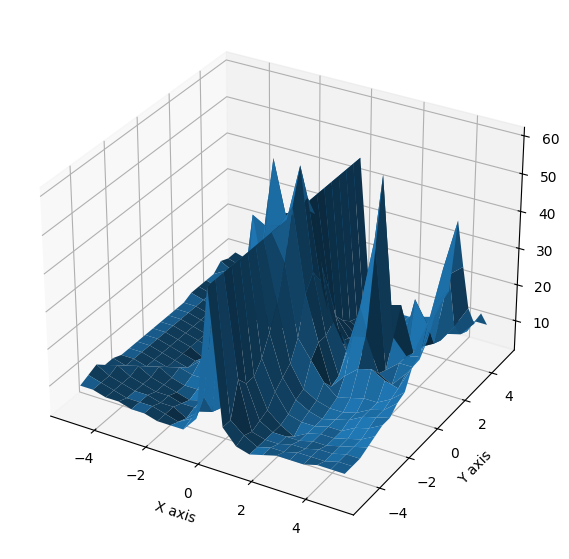

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(x, y)


Z = np.array(iters_arr).reshape(len(y), len(x))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Itters')

plt.show()

В итоге метод Ньютона дал очень хорошие результаты, были найдены все корни за достаточно маленькое количество иттераций